In [1]:
##these just load the required libaries
%matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import matador
import scipy.interpolate
import scipy.optimize
from matador.scrapers import cif2dict
from matador.crystal import Crystal
from matador.plotting import plot_pxrd
from mpl_toolkits.axes_grid1 import Divider, Size
 

In [2]:
## these are some useful values and functions
lam = 2.41 #Å
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam


In [3]:
def rebin_col_sum(b, n): #takes 2D array and a quotient to rebin by
    x = b.shape[0] % n
    if x != 0:
        b=b[:-x,:].transpose() 
    else:
        b=b.transpose()
    b=b.reshape((b.shape[0],b.shape[1]//n,n)).mean(2).transpose()
    b[:,1]=n*b[:,1]
    return b


In [5]:
Fe3 = np.loadtxt("FeCl2btd-d4_PND_1p5K_2p41A.dat")
#30K
Fe6 = np.loadtxt("FeCl2btd-d4_PND_30K_2p41A.dat")
Fe_sub = Fe3[:,1]-Fe6[:,1]

#5K
Fe7 = np.loadtxt("FeCl2btd-d4_PND_5K_2p41A.dat")
Fe_sub_2 = Fe3[:,1]-Fe7[:,1]
err_5K = np.sqrt((Fe3[:,2])**2 + (Fe7[:,2])**2)

#print(len(Fe7))

#10K
Fe8 = np.loadtxt("FeCl2btd-d4_PND_10K_2p41A.dat")
Fe_sub_3 = Fe3[:,1]-Fe8[:,1]

Q = Q2th (Fe3[:,0],2.41)

Dataout= np.column_stack((Fe3[:,0],Fe_sub))
Dataout= np.column_stack((Fe3[:,0],Fe_sub_2,err_5K))

<IPython.core.display.Javascript object>


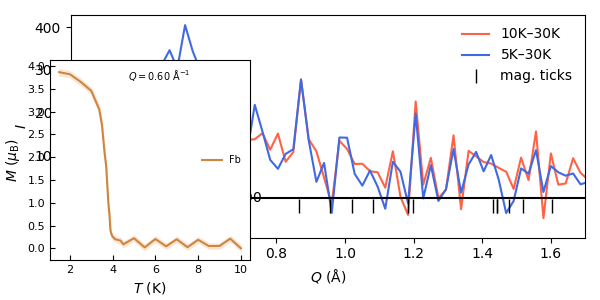

In [9]:
fig = plt.figure(3, figsize=(6, 3))
ax1 = fig.add_subplot(1, 1, 1)

n=10

Fe5K = rebin_col_sum(Fe7, n)
Fe10K = rebin_col_sum(Fe8, n)
Fe30K = rebin_col_sum(Fe6, n)

Q = Q2th (Fe30K[:,0],2.41)

plt.plot(Q,Fe10K[:,1]-Fe30K[:,1],color = 'tomato', label="10K–30K")
plt.plot(Q,Fe5K[:,1]-Fe30K[:,1],color = 'royalblue', label="5K–30K")

err_diffuse = np.sqrt((Fe5K[:,2])**2 + (Fe30K[:,2])**2)
Dataout= np.column_stack((Q[:],Fe5K[:,1]-Fe30K[:,1],err_diffuse[:]))
# np.savetxt('Fb_diffuse_5K-30K.xye', Dataout)

err_diffuse = np.sqrt((Fe10K[:,2])**2 + (Fe30K[:,2])**2)
Dataout= np.column_stack((Q[:],Fe10K[:,1]-Fe30K[:,1],err_diffuse[:]))
# np.savetxt('Fb_diffuse_10K-30K.xye', Dataout)

plt.axhline(0, c='k')

rugm = np.genfromtxt('FeCl2btd-d4_seruzi_1p5K-5K_PND_ORNL_riet_mB1+_all_rug_marks.dat')
plt.plot(rugm[:,4], ([-18]*len(rugm)), '|', label='mag. ticks', c='black', ms=10)
ax1.text(0.32,-10,"$001$",fontsize=10)
ax1.text(0.43,-10,"$010$",fontsize=10)
ax1.text(0.56,-10,"$110$",fontsize=10)
ax1.text(0.68,-10,"$200$",fontsize=10)

plt.legend(frameon=False)
ax1.set_xlim([0.2,1.7]) ## Q
plt.xlabel(r'$\mathit{Q}$ (Å)') #Q
plt.ylabel(r'$\mathit{I}$')
plt.tight_layout()
#plt.savefig('Fe_diff_error_check.pdf')
plt.show()

<IPython.core.display.Javascript object>


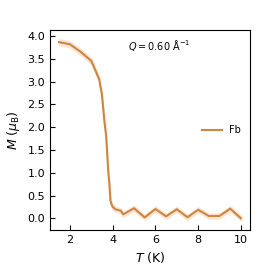

In [11]:
Fe = np.loadtxt('FeCl2btd-d4_Tdependence.dat')
Fe2 = np.loadtxt('FeCl2btd_temperature_dependence_13p2degrees_2theta.txt')
Fe = np.concatenate([Fe, Fe2])
Fe = Fe[np.argsort(Fe[:,0])]
ax_len=2
fig = plt.figure(4, figsize=(2.7, 2.7))
h = [Size.Fixed(0.5), Size.Fixed(ax_len)]
v = [Size.Fixed(0.4), Size.Fixed(ax_len)]

e=0.046

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
ax1 = fig.add_axes(divider.get_position(),axes_locator=divider.new_locator(nx=1, ny=1))
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 7
ax1.tick_params(axis='both', labelsize=8, direction="in")

p0 = (4,0.3,0.05)
M = 3.866*(Fe[:,1]-np.amin(Fe[:,1]))/(np.amax(Fe[:,1])-np.amin(Fe[:,1]))
Me = np.sqrt( (3.866*(Fe[:,2])/np.amax(Fe[:,1]))**2 + e**2 )

ax1.plot(Fe[:,0],M, c='peru',label='Fb')
plt.fill_between(Fe[:,0], (M - Me), (M + Me), color='sandybrown', alpha=0.2)
ax1.text(4.7, 3.7, '$Q=0.60$ Å$^{-1}$', fontsize=7)
ax1.set_xlabel('$T$ (K)')
ax1.set_ylabel('$M$ ($\mu_\mathrm{B}$)')
plt.legend(frameon=False, loc=5)
#plt.savefig('Fe-btd_PND_Tdep.pdf',bbox_inches='tight', transparent=True)
plt.show()